In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/stock_tweets.csv'
stock_tweets_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
stock_tweets_df.head()


,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [2]:
# Data Cleaning

# Check for missing values
missing_values = stock_tweets_df.isnull().sum()

# Check for duplicates
duplicates = stock_tweets_df.duplicated().sum()

# Convert the 'Date' column to datetime format for easier analysis
stock_tweets_df['Date'] = pd.to_datetime(stock_tweets_df['Date'])

# Overview of data types and potential formatting issues
data_types = stock_tweets_df.dtypes

missing_values, duplicates, data_types


(Date            0
 Tweet           0
 Stock Name      0
 Company Name    0
 dtype: int64,
 0,
 Date            datetime64[ns, UTC]
 Tweet                        object
 Stock Name                   object
 Company Name                 object
 dtype: object)

In [3]:
# Descriptive Statistics

# Total number of tweets
total_tweets = len(stock_tweets_df)

# Number of unique stocks mentioned
unique_stocks = stock_tweets_df['Stock Name'].nunique()

# Number of unique companies mentioned
unique_companies = stock_tweets_df['Company Name'].nunique()

# Top 5 most mentioned stocks
top_stocks = stock_tweets_df['Stock Name'].value_counts().head(5)

# Top 5 most mentioned companies
top_companies = stock_tweets_df['Company Name'].value_counts().head(5)

total_tweets, unique_stocks, unique_companies, top_stocks, top_companies


(80793,
 25,
 25,
 TSLA    37422
 TSM     11034
 AAPL     5056
 PG       4089
 AMZN     4089
 Name: Stock Name, dtype: int64,
 Tesla, Inc.                                           37422
 Taiwan Semiconductor Manufacturing Company Limited    11034
 Apple Inc.                                             5056
 Procter & Gamble Company                               4089
 Amazon.com, Inc.                                       4089
 Name: Company Name, dtype: int64)

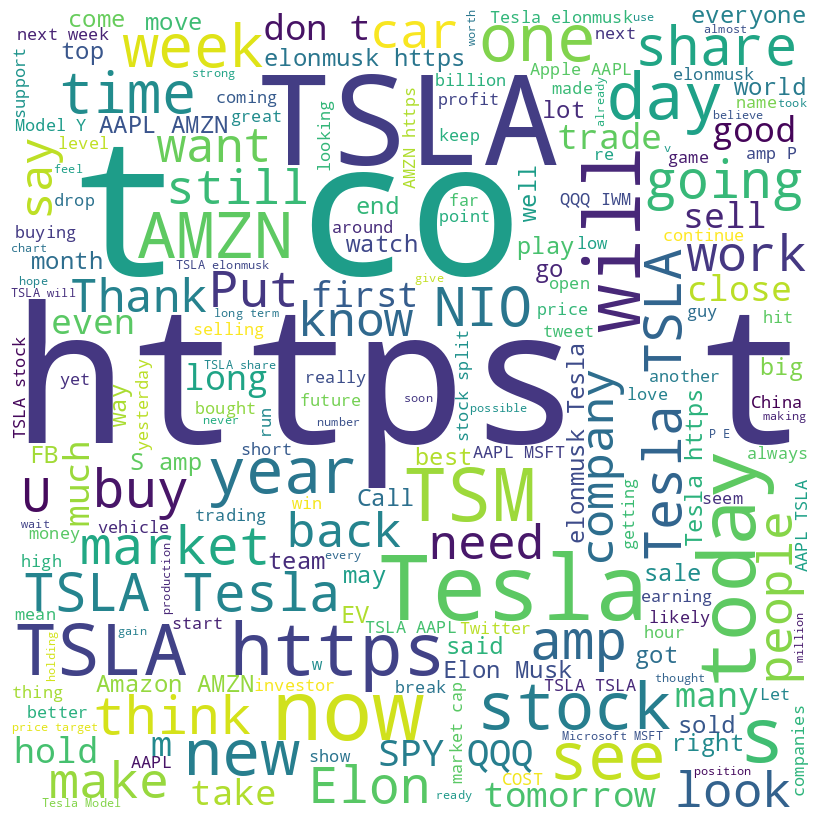

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Text Analysis - Creating a Word Cloud for the most common words in tweets

# Combine all tweets into a single string
all_tweets = ' '.join(stock_tweets_df['Tweet'])

# Create a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_tweets)

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


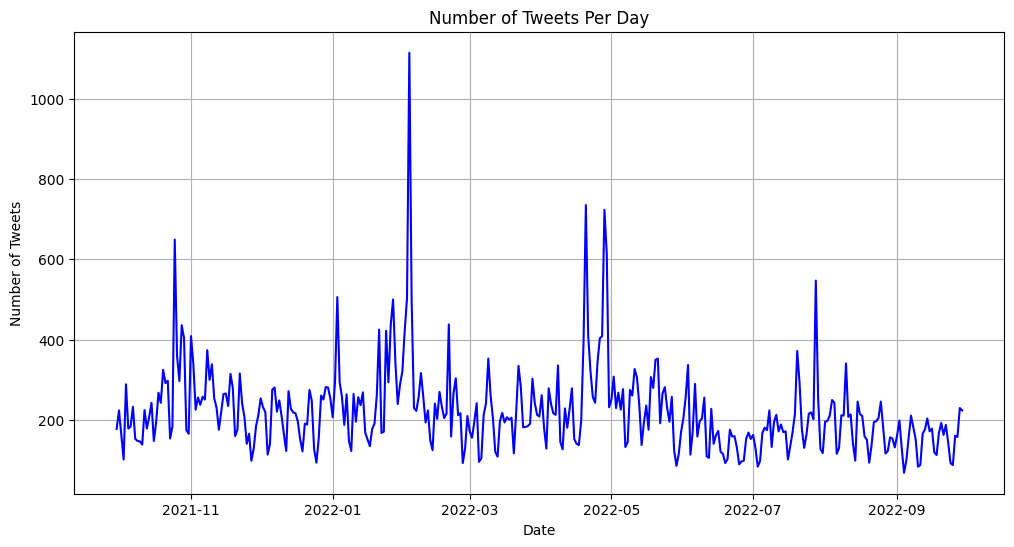

count     365.000000
mean      221.350685
std       106.117174
min        69.000000
25%       158.000000
50%       205.000000
75%       258.000000
max      1114.000000
dtype: float64

In [5]:
# Temporal Analysis

# Extracting date from datetime for daily analysis
stock_tweets_df['Date_only'] = stock_tweets_df['Date'].dt.date

# Counting the number of tweets per day
tweets_per_day = stock_tweets_df.groupby('Date_only').size()

# Plotting the number of tweets per day
plt.figure(figsize=(12, 6))
tweets_per_day.plot(kind='line', color='blue')
plt.title('Number of Tweets Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

tweets_per_day.describe()


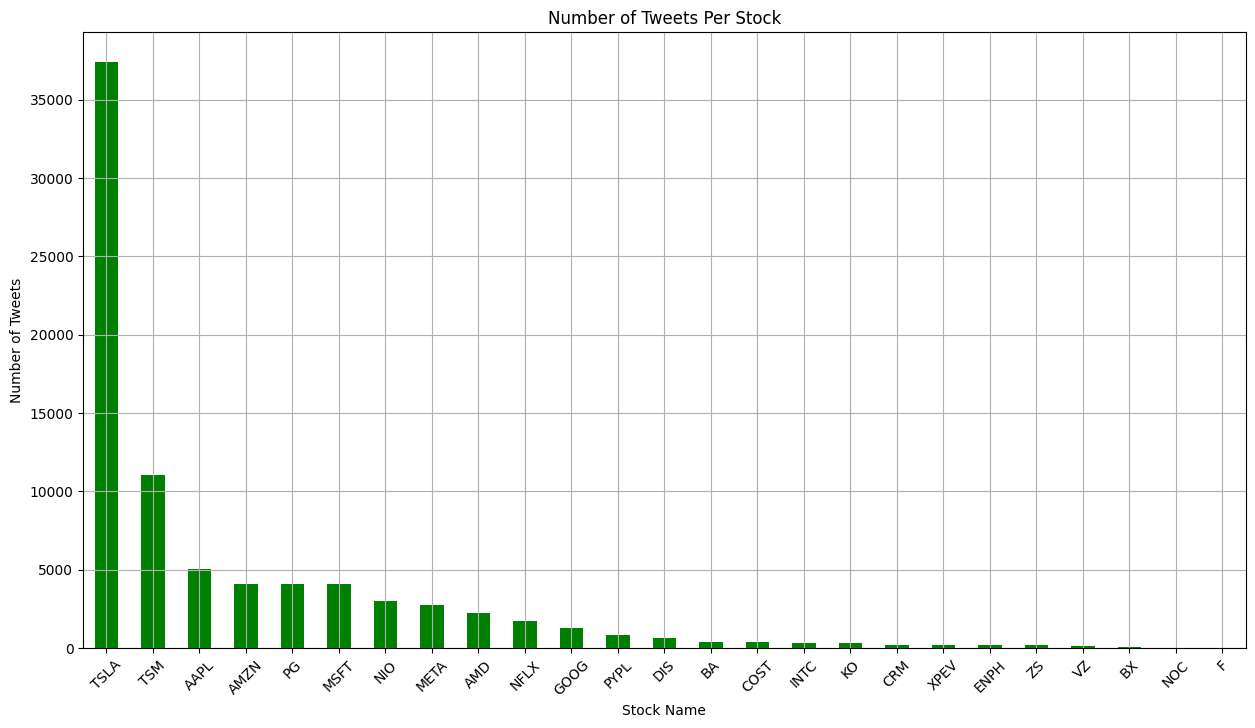

(count       25.000000
 mean      3231.720000
 std       7541.308974
 min         31.000000
 25%        225.000000
 50%        635.000000
 75%       3021.000000
 max      37422.000000
 dtype: float64,
 Stock Name
 TSLA    37422
 TSM     11034
 AAPL     5056
 AMZN     4089
 PG       4089
 dtype: int64)

In [6]:
# Stock Analysis

# Grouping by stock name and counting the number of tweets for each stock
tweets_per_stock = stock_tweets_df.groupby('Stock Name').size().sort_values(ascending=False)

# Plotting the number of tweets per stock
plt.figure(figsize=(15, 8))
tweets_per_stock.plot(kind='bar', color='green')
plt.title('Number of Tweets Per Stock')
plt.xlabel('Stock Name')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

tweets_per_stock.describe(), tweets_per_stock.head(5)


In [7]:
!pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


In [8]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [9]:
sia = SentimentIntensityAnalyzer()


In [10]:
def analyze_sentiment(tweet):
    return sia.polarity_scores(tweet)


In [11]:
stock_tweets_df['Sentiment'] = stock_tweets_df['Tweet'].apply(analyze_sentiment)


In [15]:
# This score can be used to classify each tweet as positive, negative, or neutral based on predefined thresholds (e.g., positive if compound > 0.05, negative if compound < -0.05, and neutral otherwise).
print(stock_tweets_df.head())


                       Date  \
0 2022-09-29 23:41:16+00:00   
1 2022-09-29 23:24:43+00:00   
2 2022-09-29 23:18:08+00:00   
3 2022-09-29 22:40:07+00:00   
4 2022-09-29 22:27:05+00:00   

                                               Tweet Stock Name Company Name  \
0  Mainstream media has done an amazing job at br...       TSLA  Tesla, Inc.   
1  Tesla delivery estimates are at around 364k fr...       TSLA  Tesla, Inc.   
2  3/ Even if I include 63.0M unvested RSUs as of...       TSLA  Tesla, Inc.   
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA  Tesla, Inc.   
4  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA  Tesla, Inc.   

    Date_only                                          Sentiment  
0  2022-09-29  {'neg': 0.127, 'neu': 0.758, 'pos': 0.115, 'co...  
1  2022-09-29  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2  2022-09-29  {'neg': 0.0, 'neu': 0.951, 'pos': 0.049, 'comp...  
3  2022-09-29  {'neg': 0.273, 'neu': 0.59, 'pos': 0.137, 'com...

In [13]:
stock_tweets_df.to_csv('sentiment_analysis_results.csv', index=False)


In [14]:
from google.colab import files
files.download('sentiment_analysis_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch
import pandas as pd
import numpy as np
import math

# Function to calculate perplexity for a batch of texts
def calculate_perplexity(texts, model, tokenizer, batch_size=10):
    model.eval()  # Set the model to evaluation mode
    perplexities = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        inputs = tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=256)
        inputs = {k: v.to('cpu') for k, v in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs['input_ids'])
            loss = outputs.loss
            # Adjustments for handling scalar loss
            if loss.ndim == 0:
                perplexities.append(math.exp(loss.item()))
            else:
                perplexities.extend([math.exp(loss[i].item()) for i in range(loss.size(0))])
    return np.mean(perplexities)

# Load pre-trained model and tokenizer
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Set the pad token to eos token
tokenizer.pad_token = tokenizer.eos_token

# Make sure the model is in CPU mode
model.to('cpu')

# Load datasets and sample a subset
sample_size = 100  # Reduced sample size for lower-spec computers
real_tweets_df = pd.read_csv('/content/stock_tweets.csv').sample(sample_size, random_state=1)
hypothetical_tweets_df = pd.read_csv('/content/hypothetical_stock_tweets.csv').sample(sample_size, random_state=1)

# Calculate average perplexity
avg_real_perplexity = calculate_perplexity(real_tweets_df['Tweet'].tolist(), model, tokenizer)
avg_hypothetical_perplexity = calculate_perplexity(hypothetical_tweets_df['Hypothetical Tweet'].tolist(), model, tokenizer)

print("Average Real Tweet Perplexity:", avg_real_perplexity)
print("Average Hypothetical Tweet Perplexity:", avg_hypothetical_perplexity)


Average Real Tweet Perplexity: 1172.7804314931723
Average Hypothetical Tweet Perplexity: 150.4312770788384
